In [ ]:

cfg = 'cfg0tr_rmf.yml'

#cfg = 'cfg0_manual_rm.yml'
cfg = load_cfg(cfg)
cfg = rlu.set_rec_cfg_field(cfg, num_ep=10, render_mode=None)
T = RLTester(cfg)
Tres= T.run_cfg_test()
T.print_res_all_ep(Tres)


In [24]:
from rlrom.testers import RLTester
from rlrom.utils import load_cfg
import rlrom.utils as rlu
import rlrom.plots as rlp

In [26]:
cfg = 'cfg0tr_rmf.yml'
cfg = load_cfg(cfg)
cfg = rlu.set_rec_cfg_field(cfg, num_ep=1, render_mode=None)
T = RLTester(cfg)
seed = 0
num_steps = 50
T.init_env()
        
# We actually might want to reload every time to enforce determinism     
T.load_model()
        
if T.has_stl_wrapper is False:
    episode = {'observations':[], 'actions':[],'rewards':[], 'dones':[], 'last_obs':None}

last_obs, info = T.env.reset(seed=seed)
        


/home/alex/workspace_local/rlrom/.venv/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


Imported module highway
loading field [ cfg_env ] from YAML file [ cfg_env.yml ]
loading field [ cfg_specs ] from YAML file [ cfg_specs_rmf.yml ]
loading field [ specs ] from STL file [ hw-env_specs.stl ]
loading field [ eval_formulas ] from YAML file [ cfg_eval.yml ]
loading field [ ppo ] from YAML file [ highway_env_ppo.yml ]
Imported module highway
INFO: Loading model  /home/alex/workspace_local/rlrom/examples/highway_env/models/rmf_right_lane.zip
loading PPO model succeeded


/home/alex/workspace_local/rlrom/.venv/lib/python3.12/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [27]:
%matplotlib ipympl
import matplotlib
#matplotlib.use('WebAgg')
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class live_line:
    def __init__(self, T, st, ax):
        self.get_time = T.env.get_wrapper_attr('get_time')
        get_vals_from_st = T.env.get_wrapper_attr('get_values_from_str')
        self.get_vals = lambda: get_vals_from_st(st)
        self.ax = ax                
        self.label = st
        self.line = self.reset_plot()
        
    def reset_plot(self):
        self.ax.plot([], [], label = self.label)
        return self.ax.lines[-1]
    
    def update(self):
        t = self.get_time()
        v,_ = self.get_vals()        
        self.line.set_xdata(t)
        self.line.set_ydata(v)

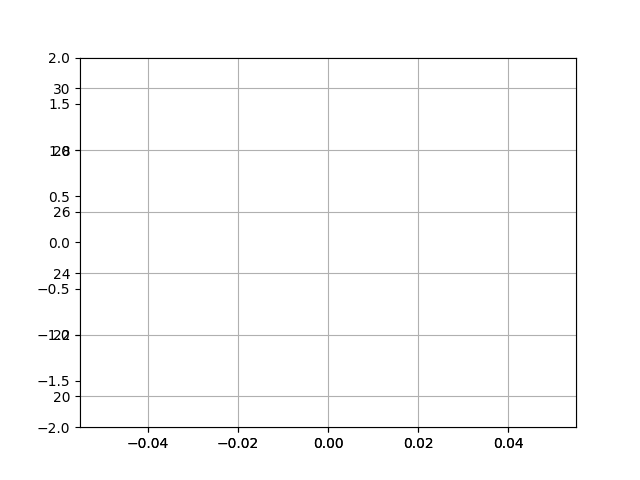

In [ ]:
layout = """
reward
ego_vx
sat(ego_right_lane)
"""

plt.ioff()
fig, ax1 = plt.subplots()
ax1.grid(True) 
ax1.set_ylim(-2, 2)
lv1 = live_line(T, 'reward', ax1)

ax2 = fig.add_subplot()
ax2.grid(True)
ax2.set_ylim(19,31)
lv2 = live_line(T, 'ego_vx', ax2)

plt.show()

In [ ]:
for _ in range(100):    

    action = T._get_action(last_obs)
    obs, reward, terminated, truncated, info = T.env.step(action)    
    t = lv1.get_time()
    lv1.update()
    lv2.update()
    ax.set_xlim(max(0, len(t)-20), len(t))
    ax.legend()
    fig.canvas.draw()
    
    last_obs=obs
    if terminated:                
       break

In [34]:
print(lv2.line.get_ydata())

[np.float32(25.0), np.float32(24.94422), np.float32(29.145267), np.float32(25.708427), np.float32(25.121061), np.float32(29.166248), np.float32(29.857521), np.float32(29.929382), np.float32(29.94272), np.float32(29.999031), np.float32(29.999878), np.float32(29.999979), np.float32(29.95371), np.float32(29.946861), np.float32(29.999743), np.float32(30.0), np.float32(30.0), np.float32(30.0), np.float32(30.0), np.float32(30.0), np.float32(30.0), np.float32(29.953712), np.float32(29.999763), np.float32(30.0), np.float32(30.0), np.float32(30.0), np.float32(30.0), np.float32(30.0), np.float32(29.953712), np.float32(29.946861), np.float32(29.999743), np.float32(25.854439), np.float32(29.291573), np.float32(29.878939), np.float32(29.93304), np.float32(29.943342), np.float32(29.99914), np.float32(29.953299), np.float32(29.999744), np.float32(29.999998), np.float32(30.0), np.float32(29.953712), np.float32(29.946861), np.float32(29.946539), np.float32(29.999743), np.float32(30.0), np.float32(30.0)

In [ ]:
from pprint import pprint
pprint(cfg['cfg_test'])

In [ ]:
l = ax.lines[0]

#l.set_ydata(y/(2*np.random.rand()))

l.set_xdata(np.append(x, 7))
l.set_ydata(np.append(y, 0))


In [ ]:
lay = """
reward
sat(fa_n_da)
sat(Gda)
sat(fa_da)
sat(n_fa_n_da)
sat(not_right_too_long, -10)
"""
fig, _=  T.get_fig(lay)
show(fig)

In [ ]:
cfg = 'cfg0_manual_rm.yml'
cfg = load_cfg(cfg)

T = RLTester(cfg)
T.run_cfg_test()

lay = """
reward
sat(fa_n_da)
sat(Gda)
sat(fa_da)
sat(n_fa_n_da)
sat(not_right_too_long, -10)
"""
fig, _=  T.get_fig(lay)
show(fig)